# Passenger Counter on Bus

[Kent Kart Passenger dataset](https://universe.roboflow.com/yolov5kentkartbus/kentkartpassengerdetection/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true)

In [2]:
!nvidia-smi

Sun Dec 14 19:15:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.60                 Driver Version: 581.60         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX 500 Ada Gener...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0             13W /   50W |       0MiB /   4094MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In powershell, run as administrator:  
`choco install ffmpeg -y`  
`ffmpeg -version`

In [ ]:
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cu130
%pip install ultralytics pandas
%pip install yt-dlp

## Train

[YOLO11 models](https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes)  
[train](https://docs.ultralytics.com/modes/train/#resuming-interrupted-trainings)

In [ ]:
from ultralytics import YOLO

def train_object_detection_model():
    model = YOLO("../yolo11n.pt")

    results = model.train(
        data="datasets/data.yaml", 
        epochs=400,
        patience=20,
        batch=24,
        imgsz=640,
        plots=True, # whether to gnerate training plots
    )
    metrics = model.val()
    print(metrics)
    return result

result = train_object_detection_model()

Ultralytics 8.3.237  Python-3.13.7 torch-2.9.1+cu130 CUDA:0 (NVIDIA RTX 500 Ada Generation Laptop GPU, 4094MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=400, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=../yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=

In [6]:
model = YOLO("runs/detect/train4/weights/last.pt")
model.train(resume=True)

Ultralytics 8.3.237  Python-3.13.7 torch-2.9.1+cu130 CUDA:0 (NVIDIA RTX 500 Ada Generation Laptop GPU, 4094MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=400, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs\detect\train4\weights\last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000234B76DBCB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### Layer types

* ultralytics.nn.modules.conv.**Conv** → standard convolutional layer
* ultralytics.nn.modules.block.**C3k2** → a "C3" block (like residual blocks in YOLO), which contains several conv layers internally
* ultralytics.nn.modules.block.**SPPF** → spatial pyramid pooling layer (helps capture multi-scale features)
* ultralytics.nn.modules.block.**C2PSA** → attention block (channel-spatial attention)
* torch.nn.modules.upsampling.**Upsample** → upsampling layer (for feature map scaling)
* ultralytics.nn.modules.conv.**Concat** → concatenates multiple feature maps
* ultralytics.nn.modules.head.**Detect** → YOLO detection head, outputs predictions for bounding boxes

### Comparison to Keras

In Keras, `model.summary()` shows layers sequentially. YOLO layers are shown linearly, but internally the network is a ***directed acyclic graph (DAG)***. That’s why some layers reference multiple previous layers (from=[16,19,22]) for concatenation or skip connections.

Each "block" (like `C3k2`) is actually multiple layers inside. So 181 layers total includes all the convs inside C3 blocks, upsampling, etc.


## Validation

In [3]:
import os
from ultralytics import YOLO

HOME = os.getcwd()
print(HOME)

c:\Codes\Python\Machine_Learning\Computer_Vision\YOLO\passenger_counter_bus


In [4]:

from typing import List, Dict, Optional, Union
from matplotlib.patches import Patch
import matplotlib.transforms as transforms

def add_interpretation_bands(
    ax,
    bands: List[Dict[str, Union[float, str]]],
    thresholds: Optional[List[float]] = None,
    *,
    label_inside: bool = True,
    label_x: float = 0.5,             
    label_fontsize: int = 10,
    label_box: bool = True,            
    show_legend: bool = True,
    legend_title: Optional[str] = None,
    legend_loc: str = "upper center",
    legend_bbox: tuple = (0.5, -0.14),  
    legend_ncol: int = 2,
    legend_frame: bool = False,
    default_alpha: float = 0.10,
    threshold_style: Optional[Dict] = None,
    zorder_span: int = 0
):

    default_colors = ["#ff4d4f", "#52c41a", "#13c2c2", "#1890ff", "#fa8c16", "#722ed1"]
    default_text_colors = ["#a8071a", "#3f8600", "#006d75", "#0958d9", "#ad4e00", "#391085"]

    ymin, ymax = ax.get_ylim() 

    tx = transforms.blended_transform_factory(ax.transAxes, ax.transData)

    spans, texts, patches = [], [], []

    for i, b in enumerate(bands):
        low = b.get("low", None)
        high = b.get("high", None)
        label = b.get("label", "")

        color = b.get("color", default_colors[i % len(default_colors)])
        tcolor = b.get("text_color", default_text_colors[i % len(default_text_colors)])

        alpha = b.get("alpha", default_alpha)

        y0 = ymin if low is None else low
        y1 = ymax if high is None else high

        y0c, y1c = max(ymin, y0), min(ymax, y1)
        if y1c <= y0c:
            continue

        span = ax.axhspan(y0c, y1c, color=color, alpha=alpha, linewidth=0, zorder=zorder_span)
        spans.append(span)

        if label_inside and label:
            y_center = (y0c + y1c) / 2.0
            bbox_kwargs = dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.7) if label_box else None
            t = ax.text(
                label_x, y_center, label,
                transform=tx, ha="center", va="center",
                fontsize=label_fontsize, color=tcolor, alpha=0.95,
                zorder=zorder_span + 2, bbox=bbox_kwargs
            )
            texts.append(t)

        legend_alpha = max(0.20, min(0.35, alpha * 2.5))
        patches.append(Patch(facecolor=color, alpha=legend_alpha, edgecolor="none", label=label or f"{y0}–{y1}"))

    if thresholds:
        style = dict(color="gray", linestyle="--", linewidth=1, alpha=0.7, zorder=zorder_span + 1)
        if threshold_style:
            style.update(threshold_style)
        for y in thresholds:
            if ymin <= y <= ymax:
                ax.axhline(y, **style)

    legend = None
    if show_legend and patches:
        legend = ax.legend(
            handles=patches, loc=legend_loc, bbox_to_anchor=legend_bbox,
            ncol=legend_ncol, frameon=legend_frame, title=legend_title
        )

    return {"patches": patches, "spans": spans, "texts": texts, "legend": legend}


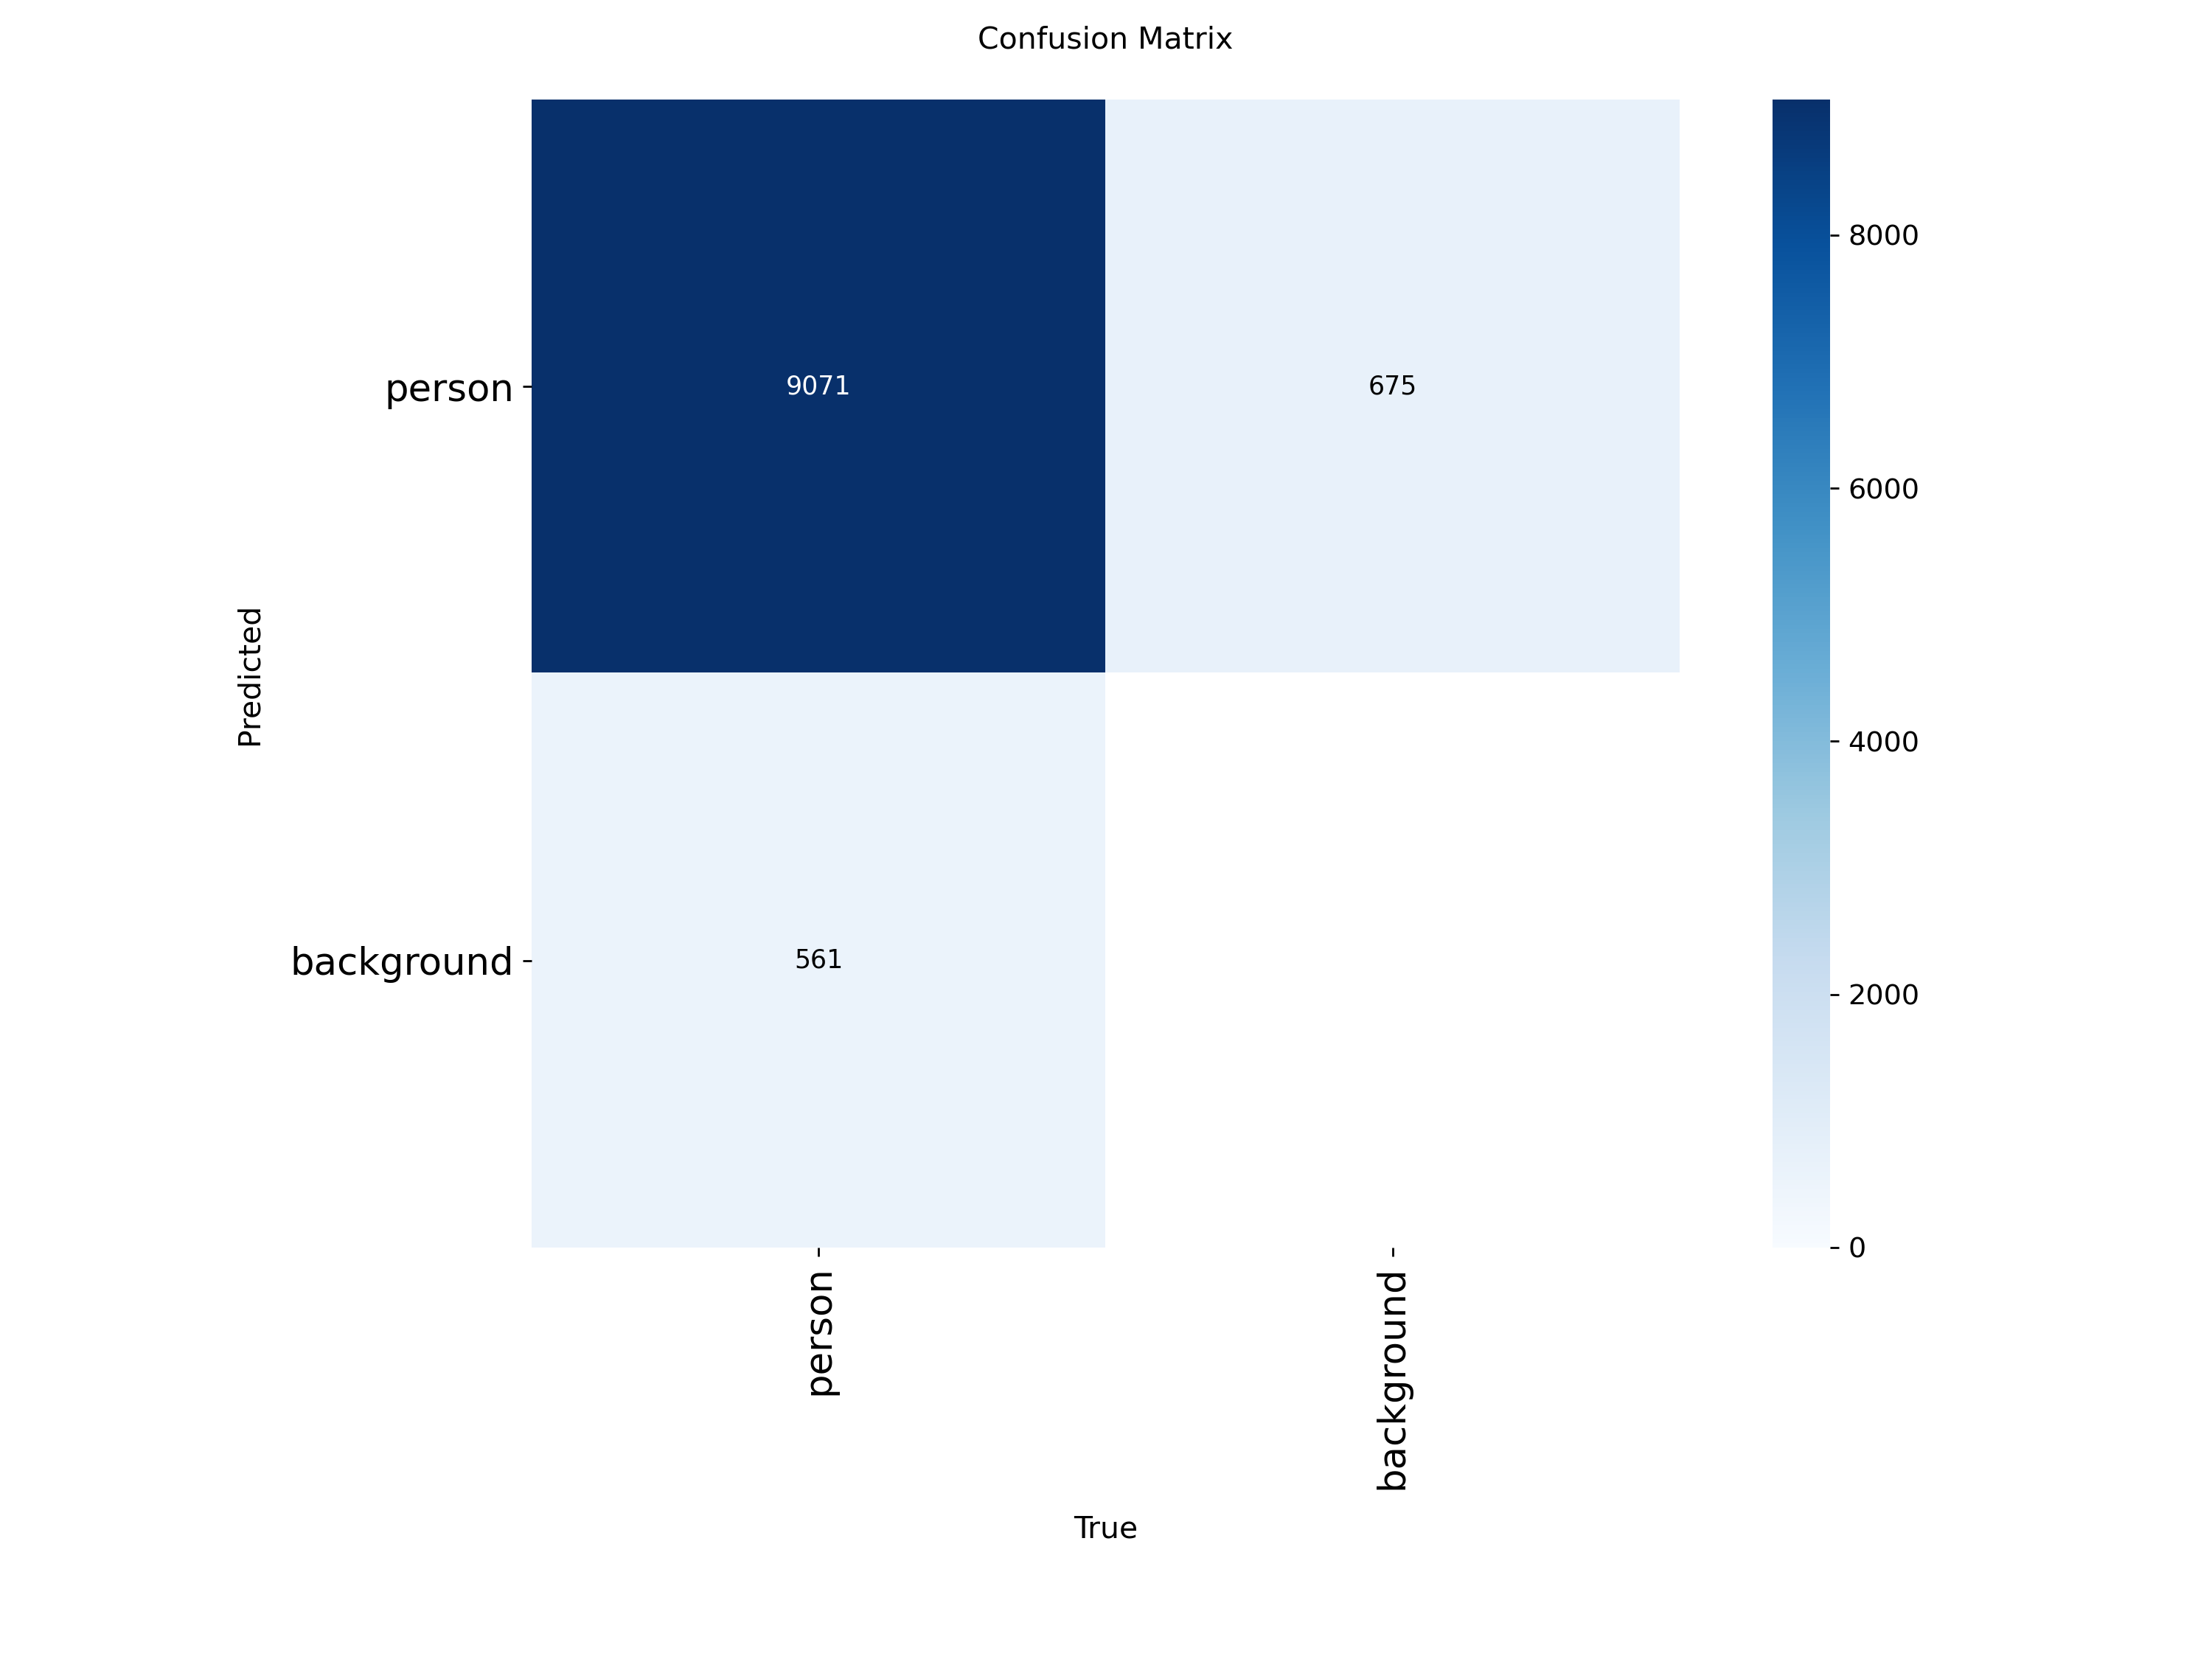

In [5]:
%matplotlib inline

from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/train4/results.csv")
epochs = df["epoch"]

Image(filename=f"{HOME}/runs/detect/train4/confusion_matrix.png", width=800)

### 1. Losses

- `box_loss` → measures spatial accuracy (where the object is)  
- `cls_loss` → measures semantic accuracy (what the object is)
- `dfl_loss` → measures box edge precision (how accurately each edge of the predicted box aligns with the ground truth; fine-tunes localization)

#### train/box_loss / val/box_loss

How well predicted bounding boxes match ground truth.

##### Practical ranges

| Box Loss (val) |	Interpretation |
| :------------- | :-------------- |
| > 1.0 |	Poor localization — boxes are far from ground truth |
| 0.5 – 1.0 |	Moderate — boxes are roughly correct, minor misalignment |
| 0.2 – 0.5 |	Good — boxes match objects very well |
| < 0.2 |	Excellent — boxes almost perfect, rare misalignment |

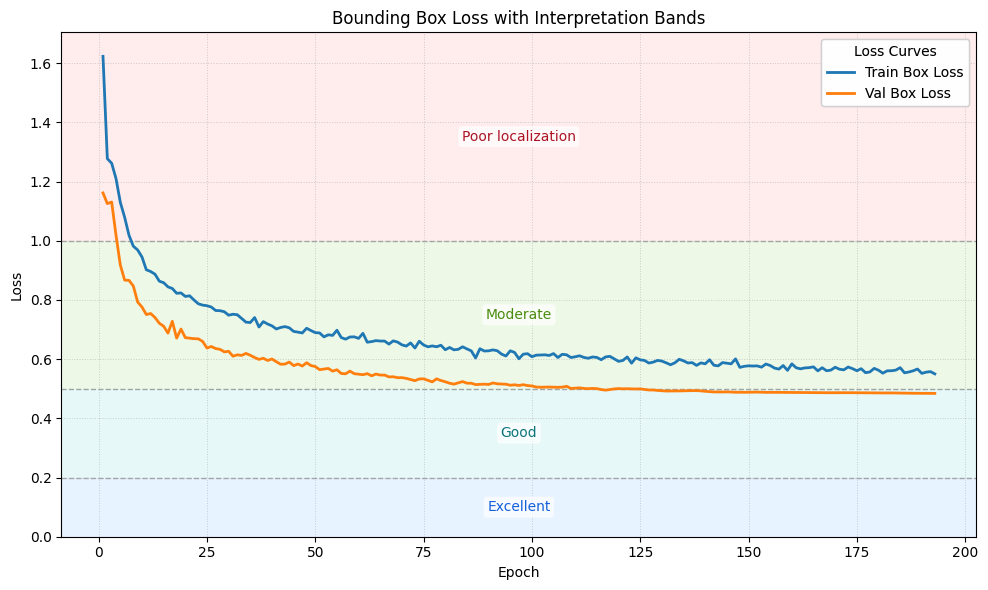

In [6]:

plt.figure(figsize=(10, 6))
ax = plt.gca()

line_train, = ax.plot(epochs, df["train/box_loss"], label="Train Box Loss", color="#1f77b4", linewidth=2)
line_val,   = ax.plot(epochs, df["val/box_loss"],   label="Val Box Loss",   color="#ff7f0e", linewidth=2)

data_ymax = float(pd.concat([df["train/box_loss"], df["val/box_loss"]]).max())
upper = max(data_ymax, 1.05) * 1.05  # ensure space above 1.0 band if needed
lower = 0.0
ax.set_ylim(lower, upper)

bands = [
    {"low": 1.0,  "high": None, "label": "Poor localization"},
    {"low": 0.5,  "high": 1.0,  "label": "Moderate"},
    {"low": 0.2,  "high": 0.5,  "label": "Good"},
    {"low": None, "high": 0.2,  "label": "Excellent"},
]

add_interpretation_bands(
    ax,
    bands=bands,
    thresholds=[1.0, 0.5, 0.2],
    label_inside=True,      
    label_x=0.5,            
    label_box=True,         
    show_legend=True,
    legend_title="Interpretation",
    legend_loc="upper center",
    legend_bbox=(0.5, -0.12),
    legend_ncol=2,
)

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Bounding Box Loss with Interpretation Bands")
ax.grid(True, linestyle=":", linewidth=0.7, alpha=0.6)

lines_legend = ax.legend(handles=[line_train, line_val], loc="upper right", title="Loss Curves")
ax.add_artist(lines_legend)

plt.tight_layout()
plt.show()


##### How to tell if it’s “converged”

1. Loss has steadily decreased epoch to epoch
2. Gap between train & val is small
    * Big gap: 
        * Train Box Loss much above Val Box Loss → usually due to small validation set or heavy augmentation
        * Train Box Loss much below Val Box Loss → Overfitting — model memorized training data, struggles on unseen data
    * Small gap → good generalization
3. Both train and val losses are high → Underfitting
4. `mAP` is high: Even if box loss is slightly above 0.5, if `mAP` is high, boxes are precise enough for practical detection


| Scenario                  | Train Loss vs Val Loss    | Meaning                               |
|---------------------------|--------------------------|---------------------------------------|
| train < val (big gap)     | Val much worse than train | Overfitting                            |
| train ≈ val, high         | Both high                 | Underfitting                           |
| train ≈ val, low          | Both low                  | Good convergence / generalization     |
| train > val (small gap)   | Val slightly better       | Usually fine, not worrying             |


---

#### train/cls_loss / val/cls_loss

Classification confidence (which class is inside the box).

* train/cls_loss measures how well the predicted class matches the ground-truth class
* val/cls_loss measures the same, but on the validation set (no gradient updates)

Formally, this is typically cross-entropy loss (or a variant like focal loss for class imbalance).

YOLO does per detected object instead of per image:
* One image can have multiple boxes
* Each box has its own class prediction
* Loss is summed/averaged over all boxes

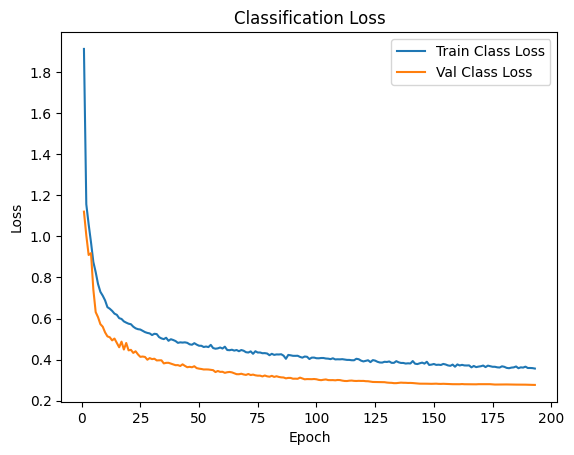

In [7]:
plt.figure()
plt.plot(epochs, df["train/cls_loss"], label="Train Class Loss")
plt.plot(epochs, df["val/cls_loss"], label="Val Class Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Classification Loss")
plt.legend()
plt.show()

#### train/dfl_loss / val/dfl_loss

Distribution Focal Loss  
Controls the precision of bounding box edges in YOLOv8+.

**Explanation:**

* YOLOv8 doesn’t predict exact box coordinates directly.
* Instead, each box edge (*left, right, top, bottom*) is modeled as a **discrete probability distribution** over possible positions.
* DFL measures how well the predicted distributions match the true box edges.
* It provides smoother gradients than standard L1/L2 loss, which helps the model learn more precise localization, especially for small or tightly cropped objects.

**Key points:**

* `train/dfl_loss` → computed on training data and used to update model weights
* `val/dfl_loss` → computed on validation data (no weight updates) to monitor generalization
* Works together with `box_loss`:
    * `box_loss` ensures boxes overlap well with ground truth
    * `dfl_loss` ensures edges are precisely aligned

**Typical behavior:**
* Decreases over epochs as the model learns to predict boxes more accurately.
* Usually smaller than `box_loss`, but still important for high-precision detection.

If we focus on the left side, DFL tells us: “how far is the predicted left edge from the true left edge”.

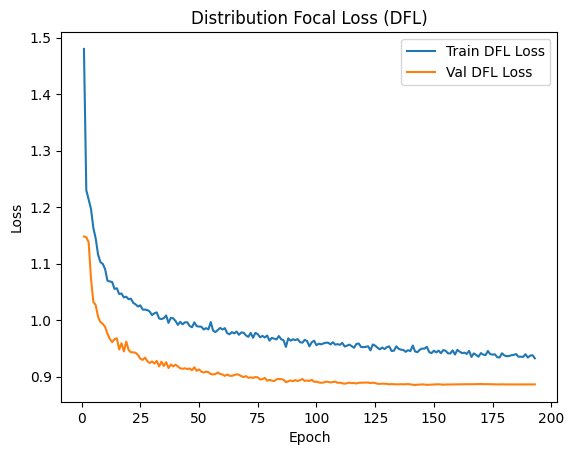

In [8]:
plt.figure()
plt.plot(epochs, df["train/dfl_loss"], label="Train DFL Loss")
plt.plot(epochs, df["val/dfl_loss"], label="Val DFL Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Distribution Focal Loss (DFL)")
plt.legend()
plt.show()

### 2. Detection metrics

#### metrics/precision(B)

Precision measures the accuracy of the model’s predictions. Specifically:

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$


* **True Positive (TP)**: predicted box matches a ground-truth box (IoU above threshold) and class is correct
* **False Positive (FP)**: predicted box does not match any ground-truth box, or class is incorrect

**Intuition:**
* High precision → most predicted boxes are correct
* Low precision → model makes many false predictions (false positives)

Works together with *recall*: a model can have high *precision* but low *recall* (few boxes predicted, but most are correct).  
In YOLO, precision is averaged over all boxes (metrics/precision(B) = box-based precision).

| Precision | Meaning |
|-----------|---------|
| 0.95      | 95% of predicted boxes are correct → excellent |
| 0.70      | 70% of predicted boxes are correct → many false positives |


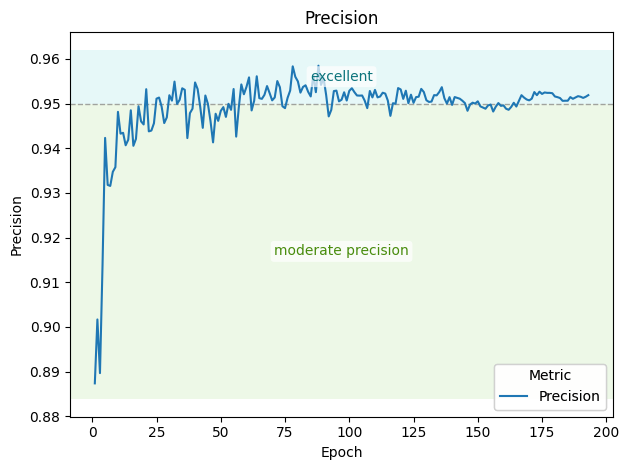

In [9]:
plt.figure()
ax = plt.gca()

line, = ax.plot(epochs, df["metrics/precision(B)"], label="Precision", color="#1f77b4")
ax.set_xlabel("Epoch")
ax.set_ylabel("Precision")
ax.set_title("Precision")

bands = [
    {"low": None, "high": 0.70, "label": "many false positives"},
    {"low": 0.70, "high": 0.95, "label": "moderate precision"},
    {"low": 0.95, "high": None, "label": "excellent"},
]

add_interpretation_bands(
    ax,
    bands=bands,
    thresholds=[0.70, 0.95],
    label_inside=True,        
    label_x=0.5,             
    label_box=True,          
    show_legend=True,
    legend_title="Precision Interpretation",
    legend_loc="upper center",
    legend_bbox=(0.5, -0.14),
    legend_ncol=2,
)

curve_legend = ax.legend(handles=[line], loc="lower right", title="Metric")
ax.add_artist(curve_legend)

plt.tight_layout()
plt.show()


#### metrics/recall(B)

Recall measures how many of the actual objects the model successfully detected.
$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

* **True Positive (TP)**: predicted box matches a ground-truth box (IoU above threshold) and class is correct
* **False Negative (FN)**: ground-truth box was not detected by the model

**Intuition:**
* High recall → the model detects most of the objects in the images
* Low recall → many objects are missed

Works together with precision: a model can have high recall but low precision (predicts many boxes, but with many false positives). 
In YOLO, recall is averaged over all boxes (metrics/recall(B) = box-based recall). 

| Recall | Meaning |
|--------|---------|
| 0.90   | 90% of real objects were detected → very good |
| 0.60   | 60% of real objects detected → many missed objects |


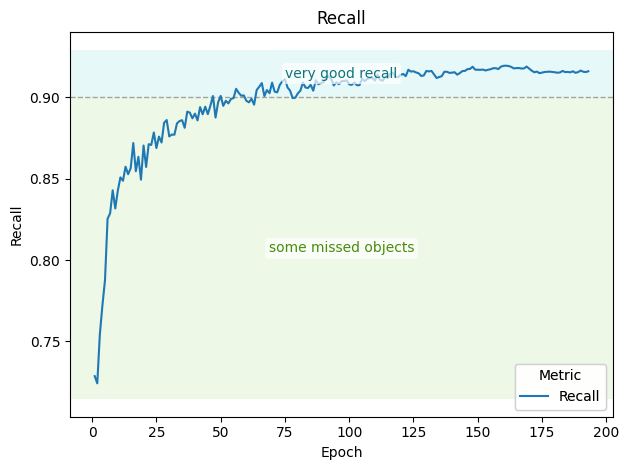

In [10]:
plt.figure()
ax = plt.gca()

line, = ax.plot(epochs, df["metrics/recall(B)"], label="Recall", color="#1f77b4")
ax.set_xlabel("Epoch")
ax.set_ylabel("Recall")
ax.set_title("Recall")

bands = [
    {"low": None, "high": 0.60, "label": "many missed objects"},
    {"low": 0.60, "high": 0.90, "label": "some missed objects"},
    {"low": 0.90, "high": None, "label": "very good recall"},
]

add_interpretation_bands(
    ax,
    bands=bands,
    thresholds=[0.60, 0.90],
    label_inside=True,        
    label_x=0.5,             
    label_box=True,         
    show_legend=True,
    legend_title="Recall Interpretation",
    legend_loc="upper center",
    legend_bbox=(0.5, -0.14),
    legend_ncol=2,
)

curve_legend = ax.legend(handles=[line], loc="lower right", title="Metric")
ax.add_artist(curve_legend)

plt.tight_layout()
plt.show()


#### metrics/mAP50(B)

mAP at IoU = 0.50 (easy criterion)

`mAP50` measures the mean Average Precision of the model at IoU = 0.50, which is a relatively easy matching criterion.  
* **IoU = 0.50** → a predicted box is considered correct if it overlaps the ground-truth box by at least 50%
* **Average Precision (AP)** → computes the area under the precision-recall curve for each class
* **mAP** → mean of APs across all classes

**Intuition:**

* **High mAP50** → the model predicts boxes that are mostly correct in both location and class
* **Low mAP50** → predictions are either poorly localized or misclassified

Easier criterion than `mAP50-95` (which averages over IoU thresholds from 0.50 to 0.95).  
Commonly used as a quick measure of detection quality.  


| mAP50 | Meaning |
|-------|---------|
| 0.95  | Excellent detection performance |
| 0.70  | Many predictions are missing or mislocalized |


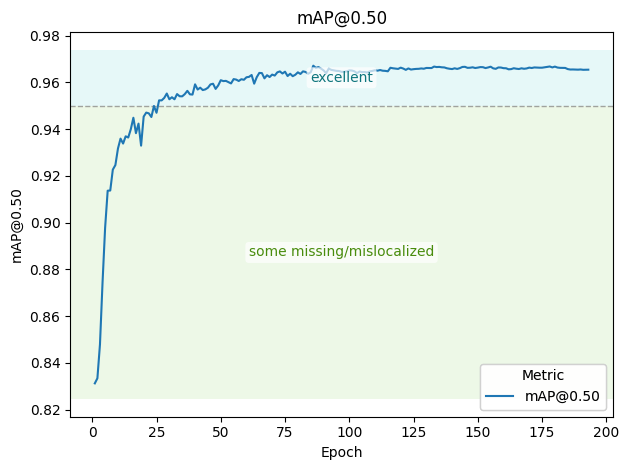

In [11]:
plt.figure()
ax = plt.gca()

line, = ax.plot(epochs, df["metrics/mAP50(B)"], label="mAP@0.50", color="#1f77b4")
ax.set_xlabel("Epoch")
ax.set_ylabel("mAP@0.50")
ax.set_title("mAP@0.50")

bands = [
    {"low": None, "high": 0.70, "label": "many missing/mislocalized"},
    {"low": 0.70, "high": 0.95, "label": "some missing/mislocalized"},
    {"low": 0.95, "high": None, "label": "excellent"},
]

add_interpretation_bands(
    ax,
    bands=bands,
    thresholds=[0.70, 0.95],
    label_inside=True,        
    label_x=0.5,             
    label_box=True,        
    show_legend=True,
    legend_title="mAP@0.50 Interpretation",
    legend_loc="upper center",
    legend_bbox=(0.5, -0.14),  
    legend_ncol=2,
)

curve_legend = ax.legend(handles=[line], loc="lower right", title="Metric")
ax.add_artist(curve_legend)

plt.tight_layout()
plt.show()


#### metrics/mAP50-95(B)

`mAP50-95` measures mean Average Precision averaged over multiple IoU thresholds from 0.50 to 0.95 in steps of 0.05.
* This is the COCO-style evaluation metric, commonly used in benchmarks
* Stricter than `mAP50`, because it requires predicted boxes to match ground truth more precisely as IoU threshold increases
* Provides a more realistic measure of detection performance

**Intuition:**
* **High mAP50-95** → the model is both accurate and precise in localization and classification
* **Lower values** → predictions may be roughly correct (detected), but edges or overlaps are not precise enough

**Rule of thumb:**
* **>0.75** → very solid detection performance
* **0.50–0.75** → good, room for improvement
* **<0.50** → model struggles, predictions may be loose or misclassified

| mAP50-95 | Meaning |
|----------|---------|
| 0.80     | Excellent detection performance; precise localization |
| 0.60     | Many boxes roughly correct, but localization could be improved |


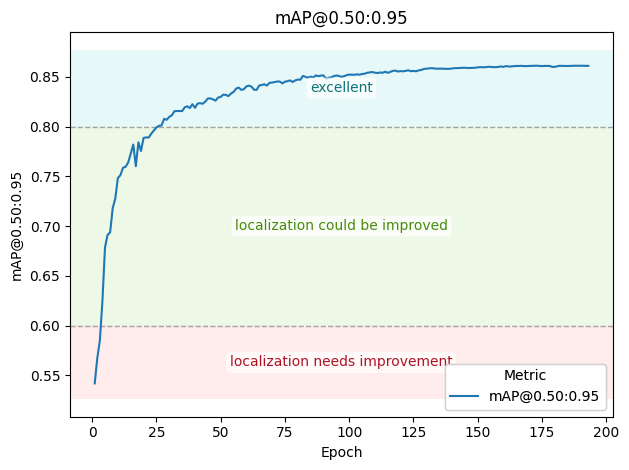

In [12]:

# mAP@0.50:0.95 with helper-based interpretation bands (uses helper defaults)
plt.figure()
ax = plt.gca()

# Your curve (unchanged)
line, = ax.plot(epochs, df["metrics/mAP50-95(B)"], label="mAP@0.50:0.95", color="#1f77b4")
ax.set_xlabel("Epoch")
ax.set_ylabel("mAP@0.50:0.95")
ax.set_title("mAP@0.50:0.95")

# Define bands using only ranges + labels (let helper supply default colors/alpha)
bands = [
    {"low": None, "high": 0.60, "label": "localization needs improvement"},
    {"low": 0.60, "high": 0.80, "label": "localization could be improved"},
    {"low": 0.80, "high": None, "label": "excellent"},
]

# Add interpretation bands, centered labels, thresholds, and bottom legend
add_interpretation_bands(
    ax,
    bands=bands,
    thresholds=[0.60, 0.80],
    label_inside=True,          # center the explanation text within each band
    label_x=0.5,                # horizontally centered
    label_box=True,             # white bubble for readability
    show_legend=True,
    legend_title="mAP@0.50:0.95 Interpretation",
    legend_loc="upper center",
    legend_bbox=(0.5, -0.14),
    legend_ncol=2,
    # rely on helper's default colors & alpha
)

# Keep your curve legend inside the plot
curve_legend = ax.legend(handles=[line], loc="lower right", title="Metric")
ax.add_artist(curve_legend)

plt.tight_layout()
plt.show()


### 3. Learning rates

#### Why YOLO has three learning rates

YOLO uses parameter groups internally, and each group can have its own learning rate:

| Parameter group | What it contains |
|-----------------|-----------------|
| pg0             | Biases in convolution layers |
| pg1             | Weights in convolution layers (regularized with weight decay) |
| pg2             | BatchNorm / other special layers (often no weight decay) |

Each group can have a different learning rate to optimize training stability.

#### Why they are overlapping in plot

* In training, all three groups share the same base learning rate
* No custom lr_mult was set for any group
* So their curves perfectly overlap → the plot shows three lines on top of each other

This is totally normal for default YOLO training.

#### How to manually set different LR for biases

You can manually create parameter groups in PyTorch and pass them to YOLO via the optimizer parameter:

<div style="width: 95%; background-color: #111; padding: 10px">

```python
# Separate parameter groups
pg0 = [p for n, p in model.model.named_parameters() if "bias" in n and p.requires_grad]
pg1 = [p for n, p in model.model.named_parameters() if "weight" in n and p.requires_grad]
pg2 = [p for n, p in model.model.named_parameters() if "bn" in n and p.requires_grad]

optimizer = torch.optim.SGD([
    {"params": pg0, "lr": 0.02},  # biases
    {"params": pg1, "lr": 0.01},  # weights
    {"params": pg2, "lr": 0.005}  # batchnorm
], momentum=0.937, weight_decay=0.0005)

results = model.train(
    data="datasets/data.yaml",
    epochs=100,
    optimizer=optimizer
)
```

</div>


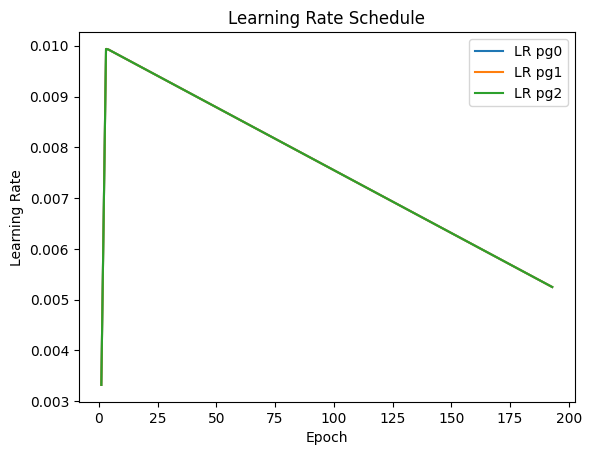

In [13]:
plt.figure()
plt.plot(epochs, df["lr/pg0"], label="LR pg0")
plt.plot(epochs, df["lr/pg1"], label="LR pg1")
plt.plot(epochs, df["lr/pg2"], label="LR pg2")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.legend()
plt.show()

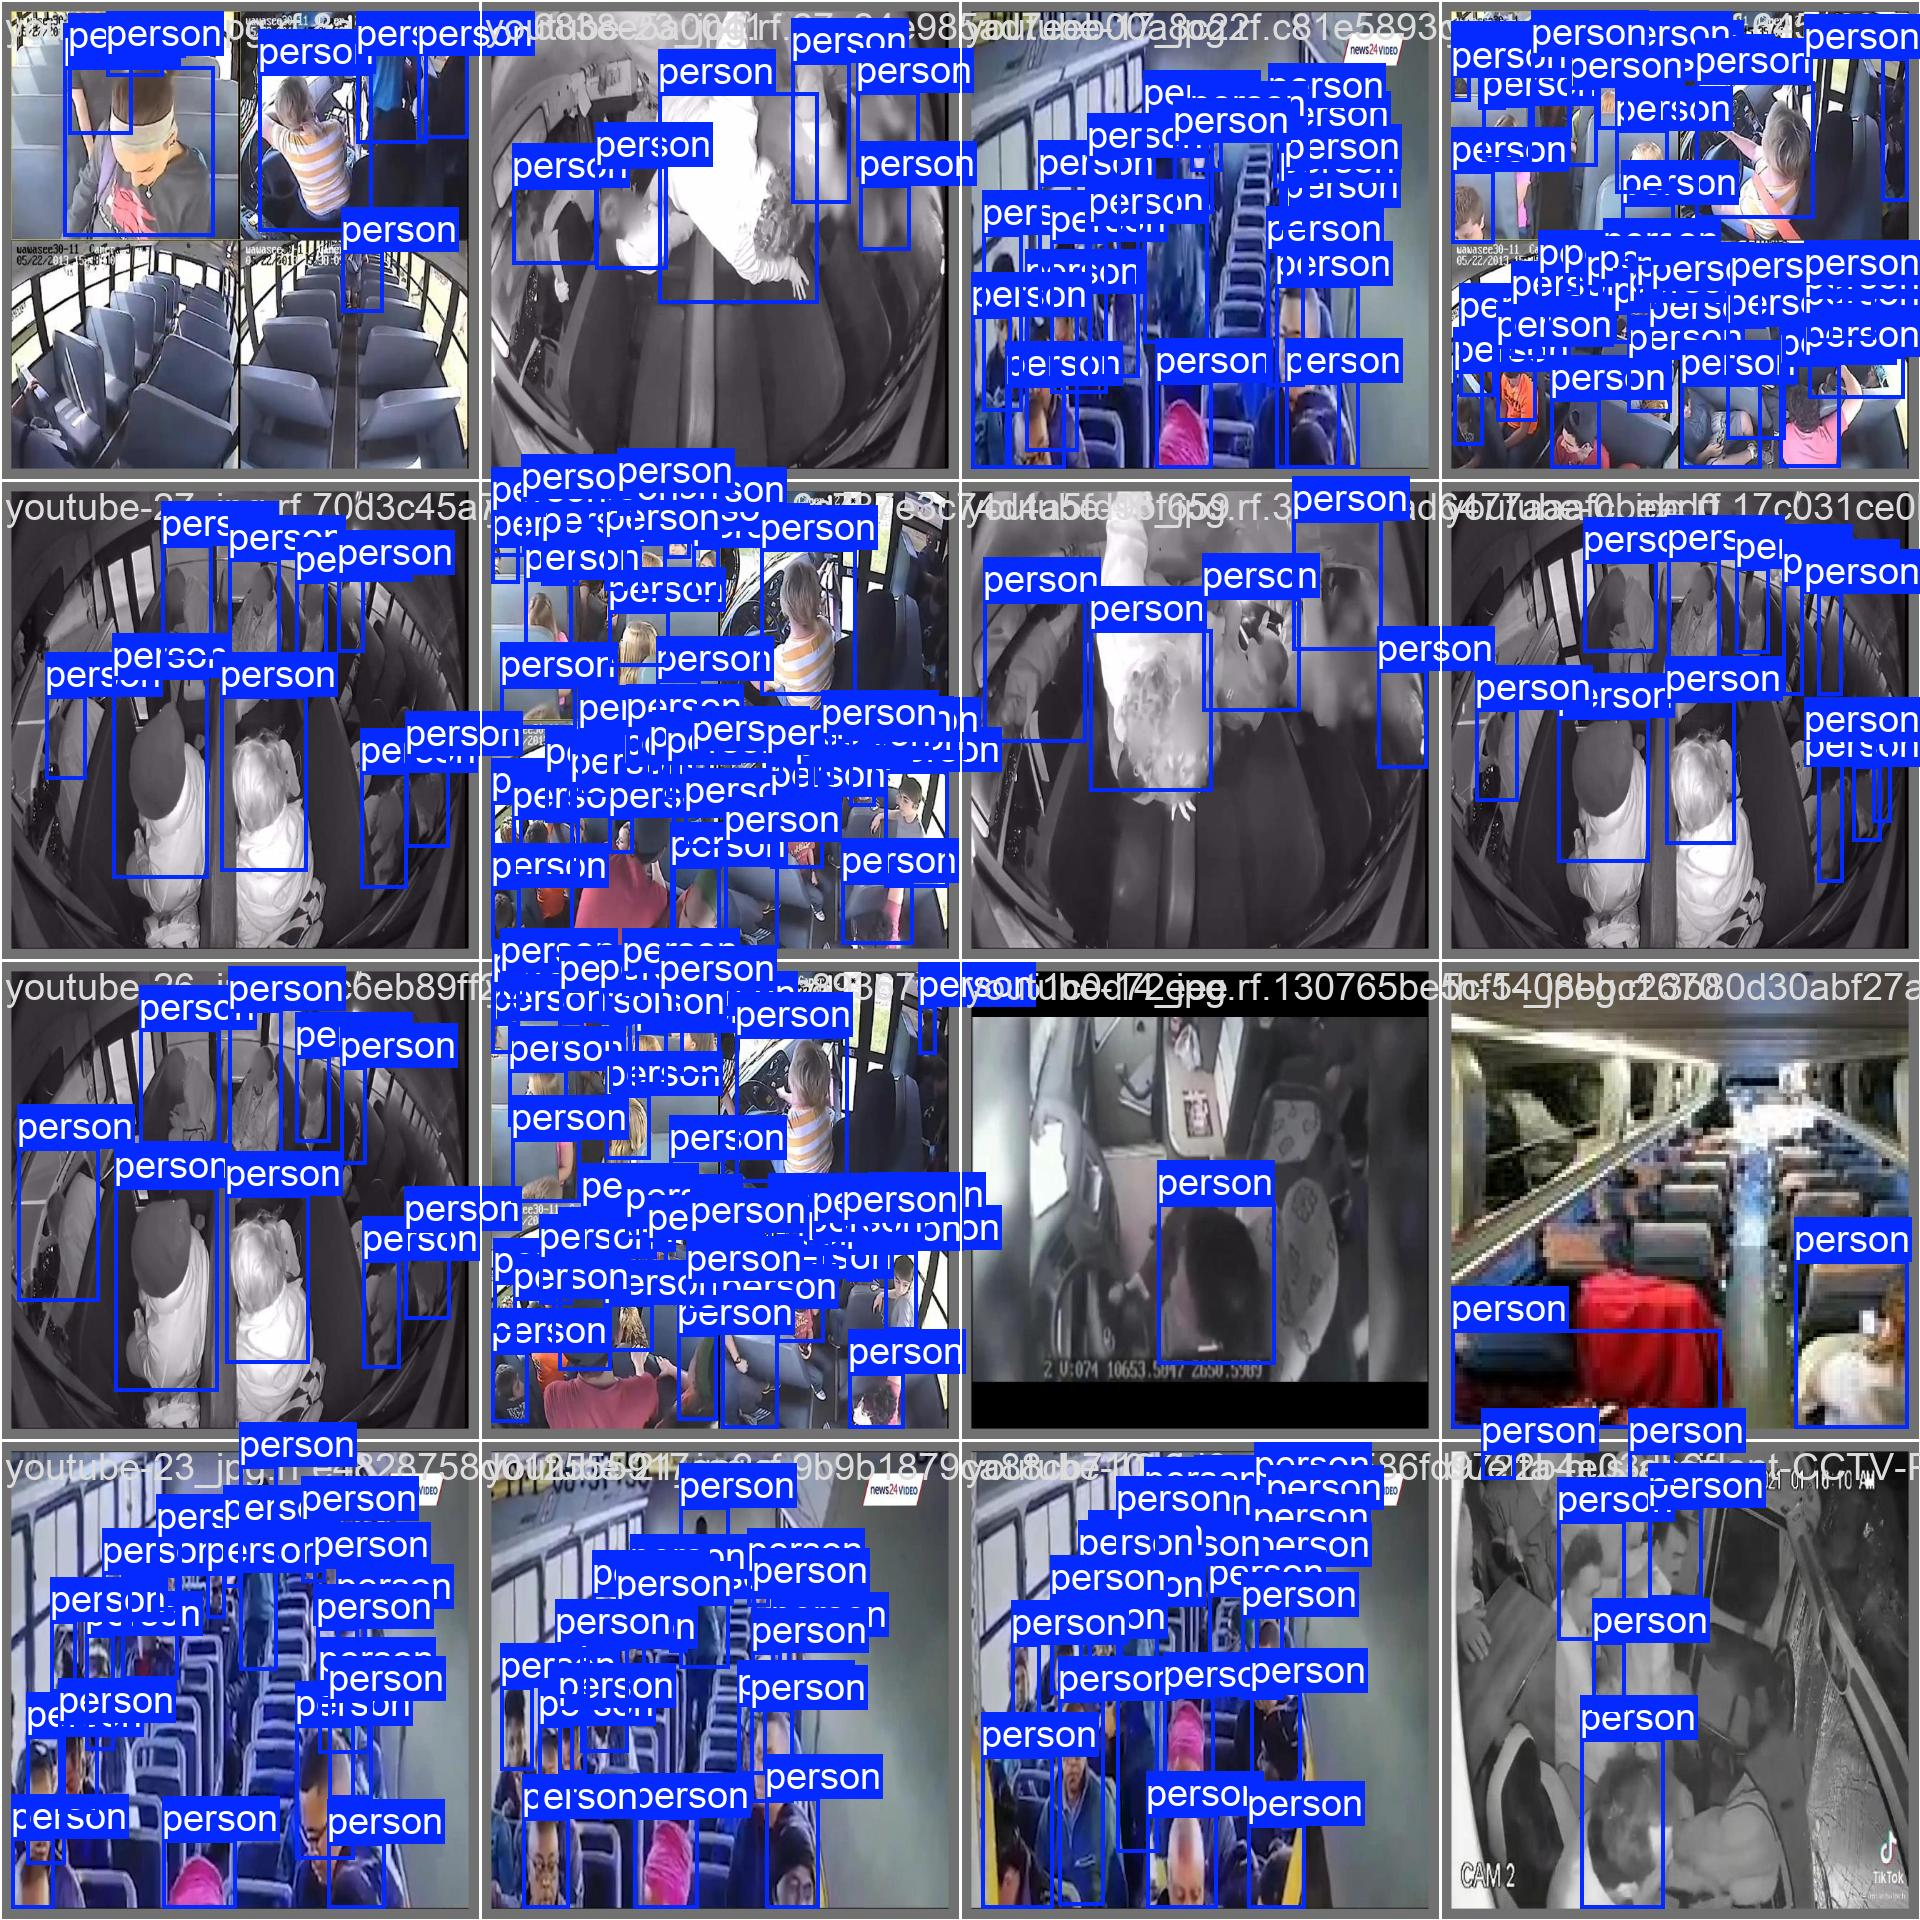

In [14]:
Image(filename=f"{HOME}/runs/detect/train4/val_batch0_labels.jpg", width=640)

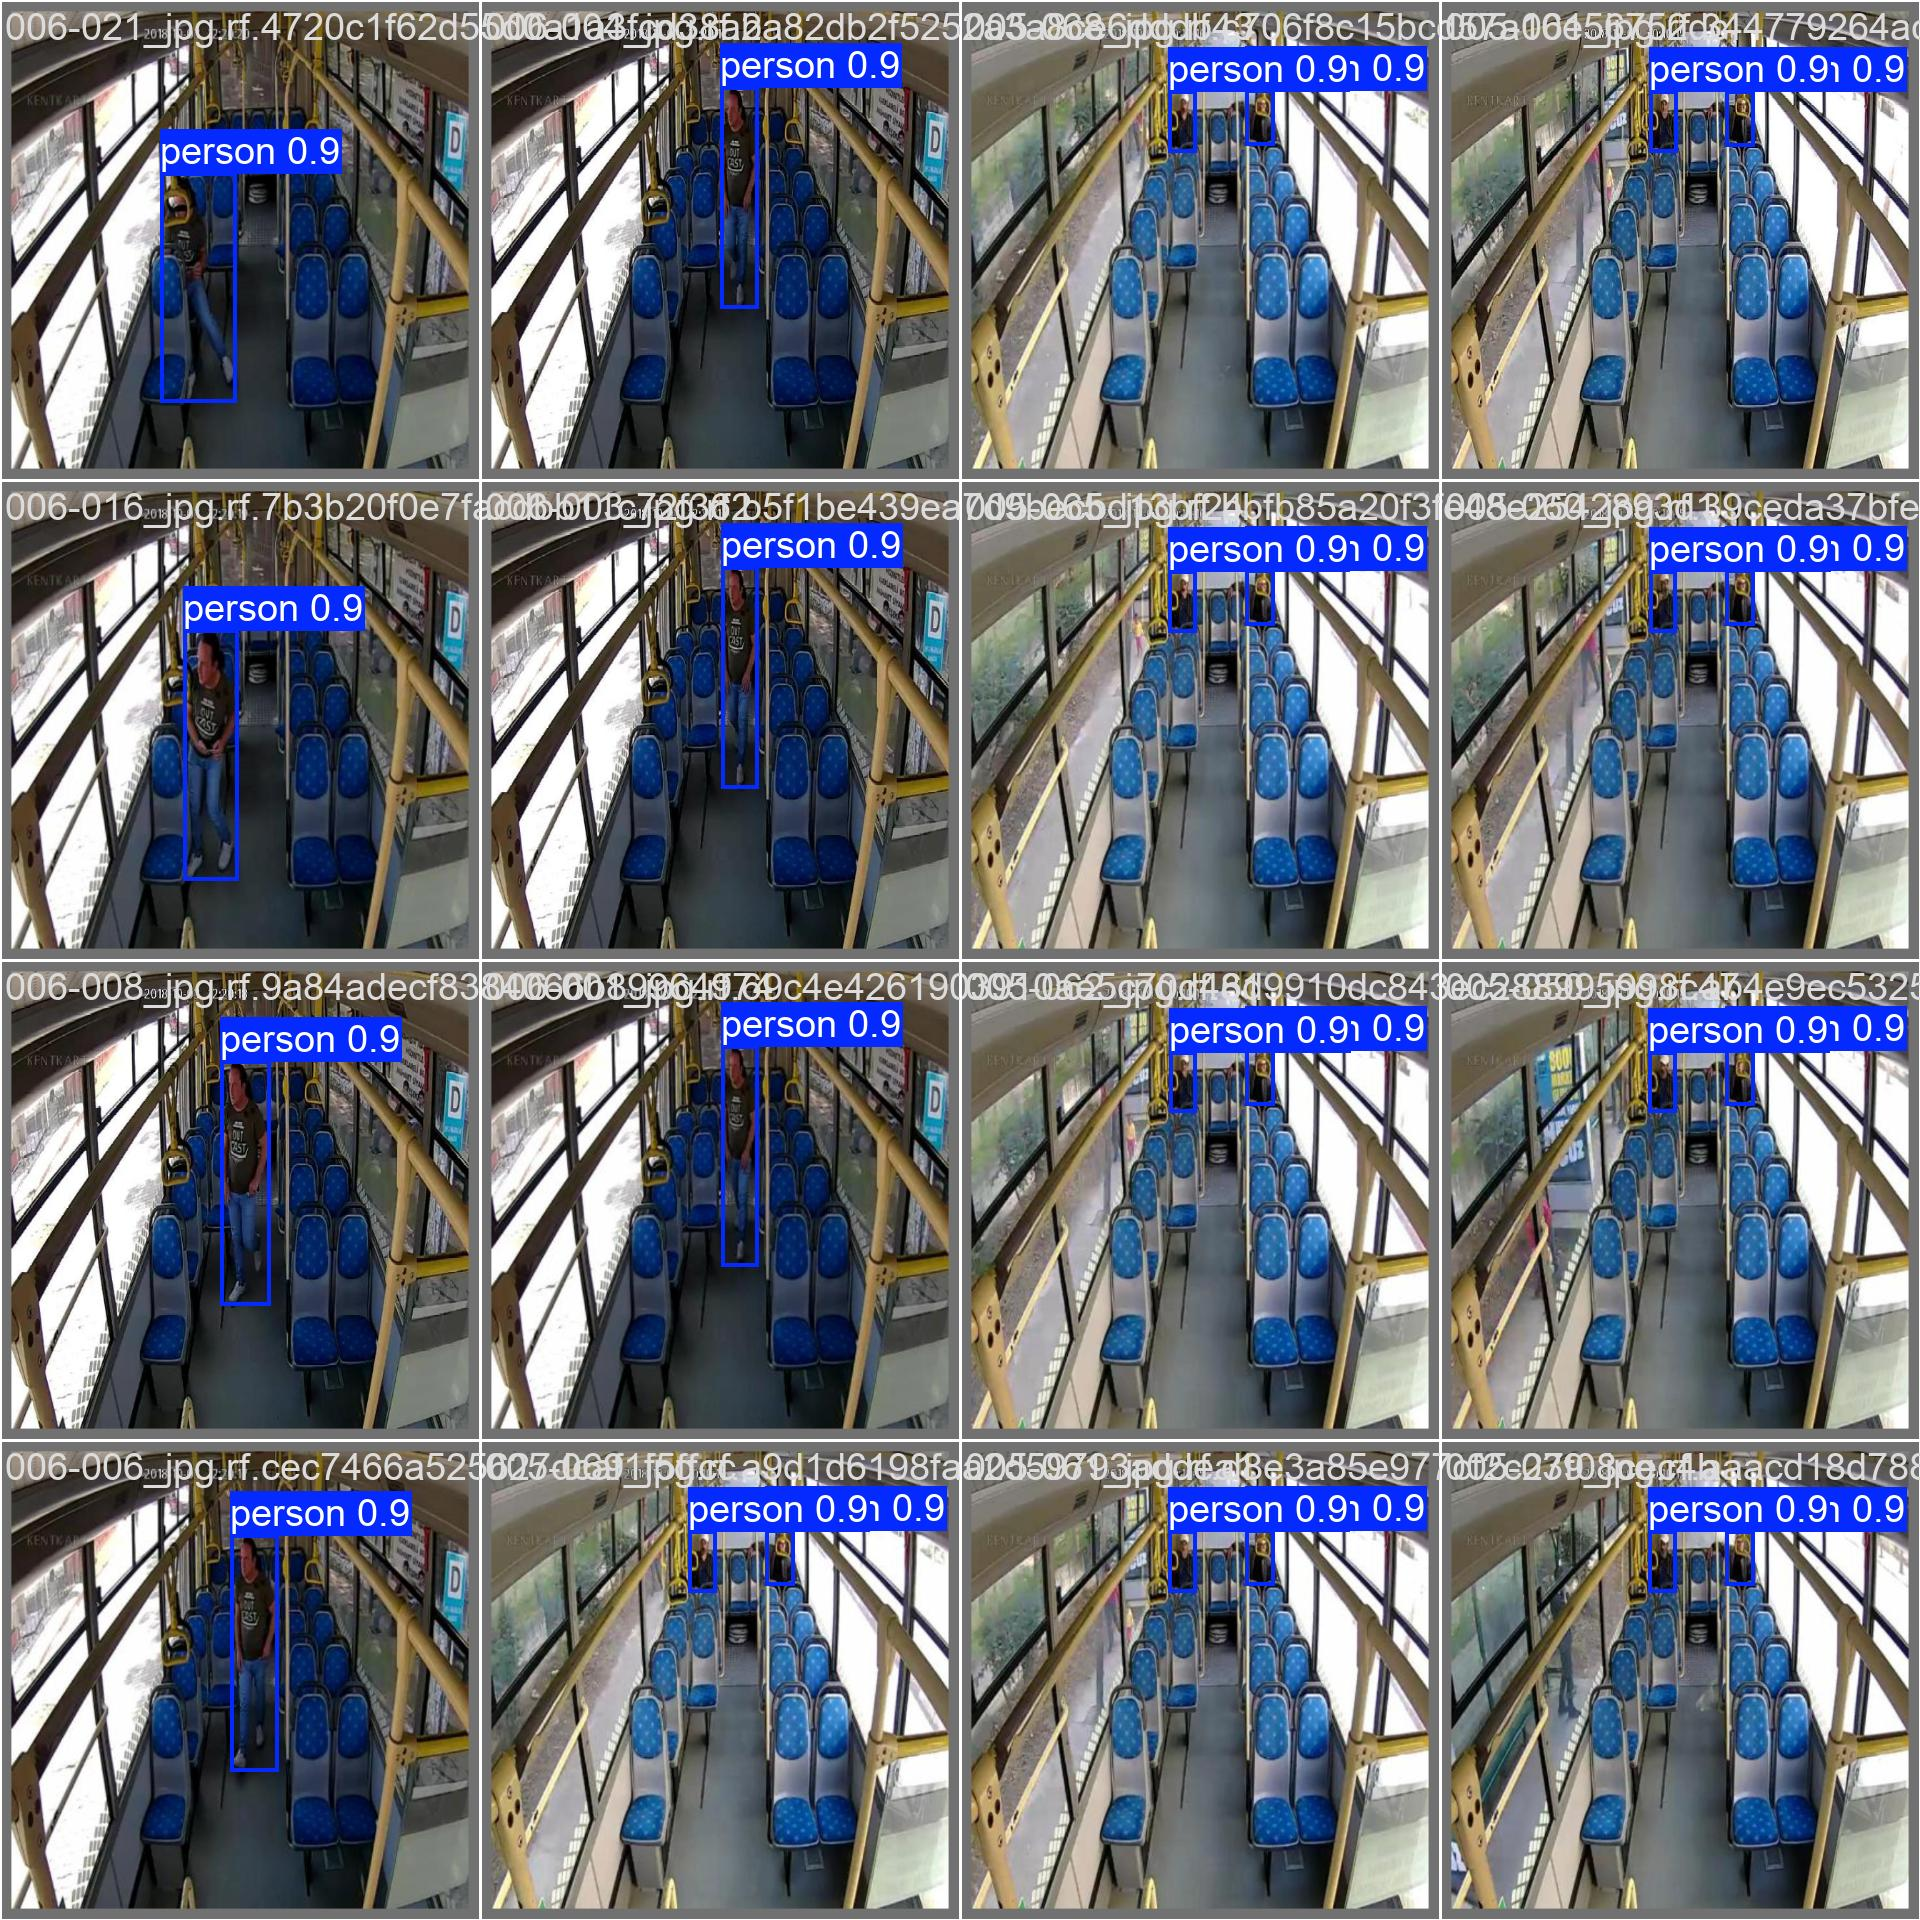

In [15]:
Image(filename=f"{HOME}/runs/detect/train4/val_batch2_pred.jpg", width=640)

## [Prediction](https://docs.ultralytics.com/modes/predict/#why-use-ultralytics-yolo-for-inference)

[parameters](https://docs.ultralytics.com/modes/predict/#inference-sources)

### Predict from validation set


image 1/1 c:\Codes\Python\Machine_Learning\Computer_Vision\YOLO\passenger_counter_bus\datasets\valid\images\004-059_jpg.rf.71a6a97841668c95eb12e9bcc662e11d.jpg: 640x640 13 persons, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 13.0ms postprocess per image at shape (1, 3, 640, 640)


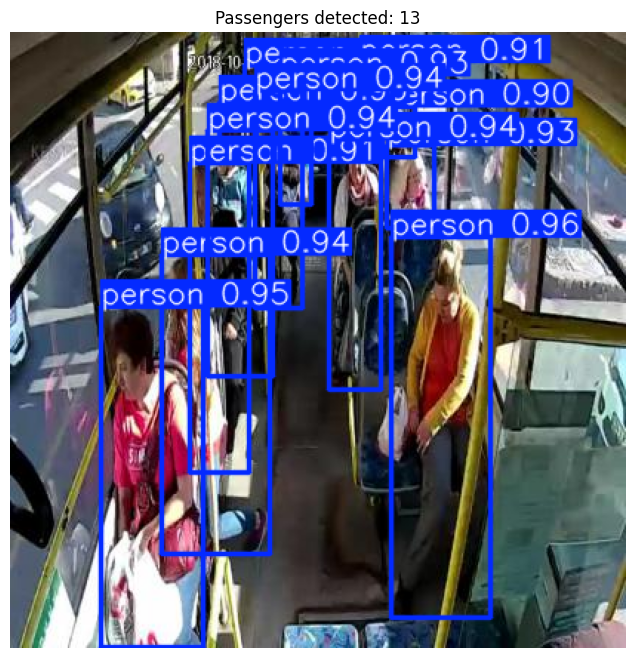

Passenger count: 13
Ground truth:  13


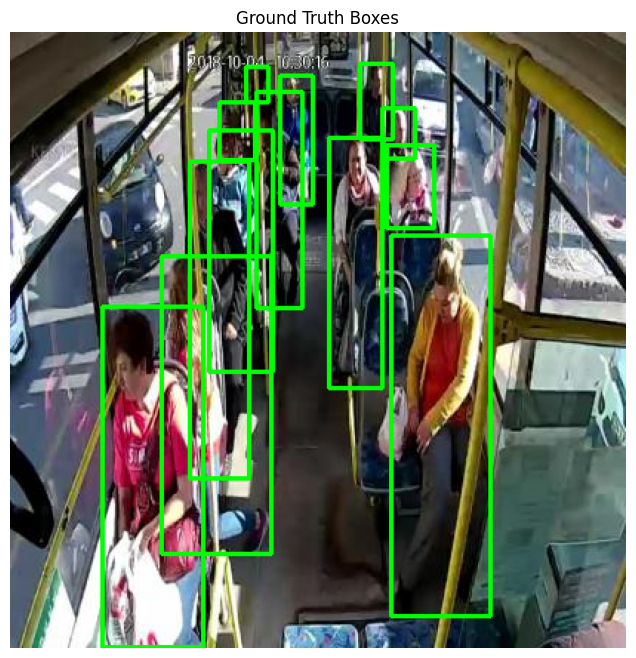

In [16]:
from pathlib import Path
import cv2

model = YOLO("runs/detect/train4/weights/best.pt")

def predict(source):
    results = model.predict(
        source=source,
        conf=0.5
    )

    r = results[0]
    count = len(r.boxes)

    img = r.plot()

    plt.figure(figsize=(8, 8))
    plt.imshow(img[..., ::-1])  # BGR → RGB
    plt.title(f"Passengers detected: {count}")
    plt.axis("off")
    plt.show()

    return count

def count_ground_truth(label_path):
    label_path = Path(label_path)

    if not label_path.exists():
        return 0
    with open(label_path, "r") as f:
        lines = f.readlines()

    return len(lines)


def draw_gt_boxes(image_path, label_path, color=(0, 255, 0), thickness=2):
    image_path = Path(image_path)
    label_path = Path(label_path)

    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, _ = img.shape

    if not label_path.exists():
        print("No label file found.")
        return img

    with open(label_path, "r") as f:
        lines = [l for l in f.readlines() if l.strip()]

    for line in lines:
        parts = line.strip().split()
        _, xc, yc, bw, bh = map(float, parts)

        # Convert normalized coords → pixel coords
        x1 = int((xc - bw / 2) * w)
        y1 = int((yc - bh / 2) * h)
        x2 = int((xc + bw / 2) * w)
        y2 = int((yc + bh / 2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

    return img

id = "002-007_jpg.rf.7ad9d0628b98207fd53091fb7c86e01a"
id = "002-048_jpg.rf.503b21ecfeea31495bb707d9ea8fbaad"
id = "004-059_jpg.rf.71a6a97841668c95eb12e9bcc662e11d"
count = predict(f"datasets/valid/images/{id}.jpg")
print("Passenger count:", count)
print("Ground truth: ", count_ground_truth(f"datasets/valid/labels/{id}.txt"))

img_gt = draw_gt_boxes(
    image_path=f"datasets/valid/images/{id}.jpg",
    label_path=f"datasets/valid/labels/{id}.txt"
)

plt.figure(figsize=(8, 8))
plt.imshow(img_gt)
plt.title("Ground Truth Boxes")
plt.axis("off")
plt.show()

In [17]:
import yt_dlp

url = "https://www.youtube.com/watch?v=3Ek0tg0bRIM"

# Download video locally
ydl_opts = {"format": "best", "outtmpl": "video.mp4"}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

[youtube] Extracting URL: https://www.youtube.com/watch?v=3Ek0tg0bRIM
[youtube] 3Ek0tg0bRIM: Downloading webpage


[youtube] 3Ek0tg0bRIM: Downloading android sdkless player API JSON
[youtube] 3Ek0tg0bRIM: Downloading web safari player API JSON


[youtube] 3Ek0tg0bRIM: Downloading m3u8 information


[info] 3Ek0tg0bRIM: Downloading 1 format(s): 300
[download] video.mp4 has already been downloaded
[download] 100% of    5.71MiB


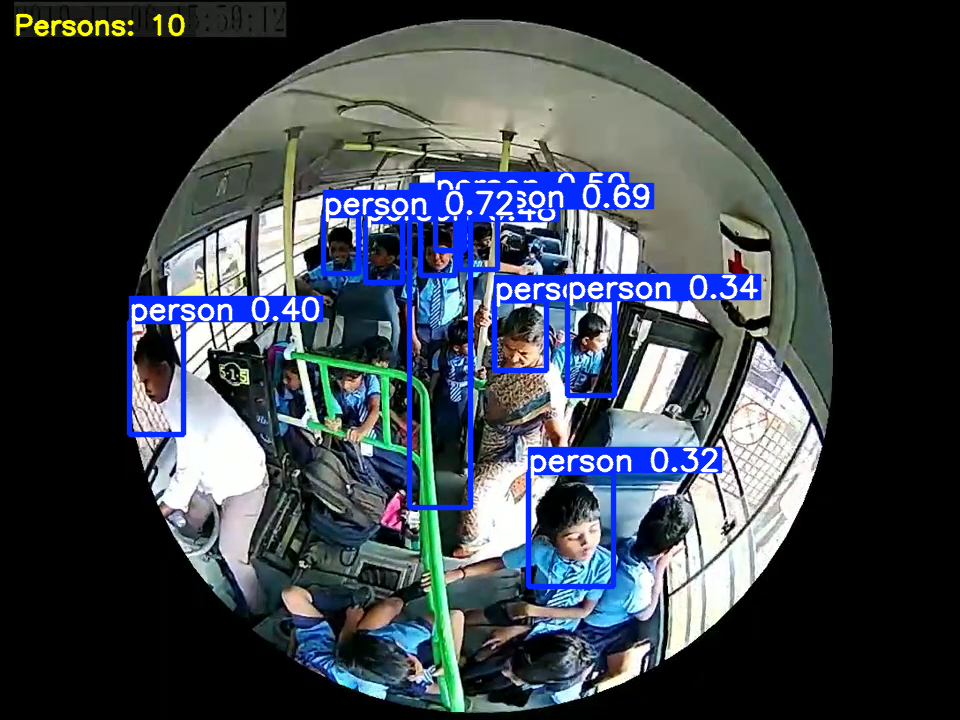

In [ ]:

import numpy as np
import cv2
from PIL import Image
from IPython.display import display, clear_output

results = model.predict(
    "video.mp4",
    save=True, 
    project="runs/predict",
    name="video_exp1",
    exist_ok=True
)

for i, r in enumerate(results):

    class_ids = (
        r.boxes.cls.cpu().numpy().astype(int)
        if (r.boxes is not None and len(r.boxes) > 0)
        else np.array([], dtype=int)
    )


    names = r.names  
    person_ids = {k for k, v in names.items() if str(v).lower() == "person"}


    persons_in_frame = int(np.isin(class_ids, list(person_ids)).sum())

    frame_bgr = r.plot()

    pad = 8
    x1, y1 = 6, 6
    text = f"Persons: {persons_in_frame}"

    (tw, th), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 2)
    x2, y2 = x1 + tw + 2*pad, y1 + th + 2*pad
    overlay = frame_bgr.copy()
    cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 0, 0), thickness=-1)  # black
    alpha = 0.35
    frame_bgr = cv2.addWeighted(overlay, alpha, frame_bgr, 1 - alpha, 0)

    cv2.putText(frame_bgr, text, (x1 + pad, y1 + th + pad),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2, cv2.LINE_AA)

    display(Image.fromarray(frame_bgr[:, :, ::-1]))
    clear_output(wait=True)
